In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
# from sklearn import tree

# For reproducible results
RANDOM_STATE_SEED = 420

In [2]:
df_dataset = pd.read_csv("modified_dataset.csv")

In [3]:
df_dataset

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,141385,9,7,553,3773.0,202,0,61.444444,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
1,49684,6,281,2,1,38,0.0,38,0,19.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
2,443,6,279824,11,15,1086,10527.0,385,0,98.727273,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
3,443,6,132,2,0,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
4,443,6,274016,9,13,1285,6141.0,517,0,142.777778,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416023,21,6,25,1,1,0,0.0,0,0,0.000000,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1416024,21,6,37,1,1,0,0.0,0,0,0.000000,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1416025,0,0,112640543,3,0,0,0.0,0,0,0.000000,...,0,0.0,0.0,0.0,0.0,56300000.0,7.778175,56300000.0,56300000.0,0
1416026,21,6,41,1,1,0,0.0,0,0,0.000000,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1


In [4]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416028 entries, 0 to 1416027
Data columns (total 73 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1416028 non-null  int64  
 1   Protocol           1416028 non-null  int64  
 2   Flow Duration      1416028 non-null  int64  
 3   Tot Fwd Pkts       1416028 non-null  int64  
 4   Tot Bwd Pkts       1416028 non-null  int64  
 5   TotLen Fwd Pkts    1416028 non-null  int64  
 6   TotLen Bwd Pkts    1416028 non-null  float64
 7   Fwd Pkt Len Max    1416028 non-null  int64  
 8   Fwd Pkt Len Min    1416028 non-null  int64  
 9   Fwd Pkt Len Mean   1416028 non-null  float64
 10  Fwd Pkt Len Std    1416028 non-null  float64
 11  Bwd Pkt Len Max    1416028 non-null  int64  
 12  Bwd Pkt Len Min    1416028 non-null  int64  
 13  Bwd Pkt Len Mean   1416028 non-null  float64
 14  Bwd Pkt Len Std    1416028 non-null  float64
 15  Flow IAT Mean      1416028 non-n

In [5]:
from sklearn.model_selection import train_test_split
# For reproducible results
RANDOM_STATE_SEED = 420


train, test = train_test_split(df_dataset, test_size=0.3, random_state=RANDOM_STATE_SEED)

In [6]:
train


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
149979,8080,6,11294,3,4,326,129.0,326,0,108.666667,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1200461,45276,6,5191674,5,4,935,345.0,935,0,187.000000,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
935973,80,6,74985,3,0,0,0.0,0,0,0.000000,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
184793,50835,6,11707,5,2,129,326.0,112,0,25.800000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
985486,60612,6,4418699,5,4,935,744.0,935,0,187.000000,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049785,80,6,21752,2,0,0,0.0,0,0,0.000000,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
178094,8080,6,11973,3,4,326,129.0,326,0,108.666667,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
510579,67,17,628,1,1,315,302.0,315,315,315.000000,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1242184,37928,6,4156261,5,3,935,353.0,935,0,187.000000,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
test

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
201015,8080,6,9947,3,4,326,129.0,326,0,108.666667,...,20,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,1
237097,3389,6,3867260,14,8,1440,1731.0,725,0,102.857143,...,20,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0
619147,50576,6,3556,4,1,543,0.0,440,0,135.750000,...,20,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0
472313,3389,6,3991889,14,8,1459,1731.0,741,0,104.214286,...,20,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0
317009,0,0,59718594,2,0,0,0.0,0,0,0.000000,...,0,0.0,0.000,0.0,0.0,59700000.0,0.000000,59700000.0,59700000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787951,443,6,118410960,55,88,2308,97956.0,499,0,41.963636,...,20,956584.5,1199857.677,1805012.0,108157.0,58200000.0,188073.433200,58300000.0,58100000.0,0
235368,53,17,374,1,1,55,87.0,55,55,55.000000,...,8,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0
1329922,39802,6,4207817,5,3,935,364.0,935,0,187.000000,...,32,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0
584294,0,0,112637599,3,0,0,0.0,0,0,0.000000,...,0,0.0,0.000,0.0,0.0,56300000.0,0.707107,56300000.0,56300000.0,0


In [8]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd  # Assuming you're using pandas for DataFrames

# Identify numerical columns in your training data
numerical_cols = [col for col in train.columns if pd.api.types.is_numeric_dtype(train[col])]

# Now you can use numerical_cols for scaling
min_max_scaler = MinMaxScaler().fit(train[numerical_cols])


In [9]:
train[numerical_cols] = min_max_scaler.transform(train[numerical_cols])

In [10]:
train

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
149979,0.123295,0.352941,0.000094,0.000057,0.000058,0.000296,0.000001,0.111951,0.000000,0.074429,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1200461,0.690878,0.352941,0.043264,0.000114,0.000058,0.000850,0.000003,0.321085,0.000000,0.128082,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
935973,0.001221,0.352941,0.000625,0.000057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
184793,0.775704,0.352941,0.000098,0.000114,0.000029,0.000117,0.000003,0.038462,0.000000,0.017671,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
985486,0.924894,0.352941,0.036822,0.000114,0.000058,0.000850,0.000007,0.321085,0.000000,0.128082,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049785,0.001221,0.352941,0.000181,0.000029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
178094,0.123295,0.352941,0.000100,0.000057,0.000058,0.000296,0.000001,0.111951,0.000000,0.074429,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
510579,0.001022,1.000000,0.000005,0.000000,0.000014,0.000286,0.000003,0.108173,0.215753,0.215753,...,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1242184,0.578753,0.352941,0.034636,0.000114,0.000043,0.000850,0.000003,0.321085,0.000000,0.128082,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
test[numerical_cols] = min_max_scaler.transform(test[numerical_cols])

In [12]:
test

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
201015,0.123295,0.352941,0.000083,0.000057,0.000058,0.000296,1.277228e-06,0.111951,0.000000,0.074429,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.0
237097,0.051714,0.352941,0.032227,0.000371,0.000116,0.001308,1.713861e-05,0.248970,0.000000,0.070450,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0
619147,0.771752,0.352941,0.000030,0.000086,0.000014,0.000493,0.000000e+00,0.151099,0.000000,0.092979,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0
472313,0.051714,0.352941,0.033266,0.000371,0.000116,0.001326,1.713861e-05,0.254464,0.000000,0.071380,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0
317009,0.000000,0.000000,0.497655,0.000029,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.497500,0.000000e+00,0.497500,0.497500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787951,0.006760,0.352941,0.986758,0.001540,0.001271,0.002097,9.698614e-04,0.171360,0.000000,0.028742,...,0.454545,0.008618,0.016019,0.016261,0.000974,0.485000,2.721757e-03,0.485833,0.484167,0.0
235368,0.000809,1.000000,0.000003,0.000000,0.000014,0.000050,8.613861e-07,0.018887,0.037671,0.037671,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0
1329922,0.607349,0.352941,0.035065,0.000114,0.000043,0.000850,3.603960e-06,0.321085,0.000000,0.128082,...,0.727273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0
584294,0.000000,0.000000,0.938647,0.000057,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.469167,1.023309e-08,0.469167,0.469167,0.0


# 2- Checking label distribution

In [13]:
print("Full dataset:\n")
print("Benign: " + str(df_dataset["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(df_dataset["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Training set:\n")
print("Benign: " + str(train["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(train["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Test set:\n")
print("Benign: " + str(test["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(test["Label"].value_counts()[[1]].sum()))

Full dataset:

Benign: 1125939
Malicious: 290089
---------------
Training set:

Benign: 788323
Malicious: 202896
---------------
Test set:

Benign: 337616
Malicious: 87193


# 3- Splitting to X_train, y_train, X_test, y_test

In [14]:
y_train = np.array(train.pop("Label")) # pop removes "Label" from the dataframe
X_train = train.values

print(type(X_train))
print(type(y_train))
print(X_train.shape)
print(y_train.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(991219, 72)
(991219,)


In [15]:
y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
X_test = test.values

print(type(X_test))
print(type(y_test))
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(424809, 72)
(424809,)


# 4- Fitting Decision Tree model

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)

hyperparameters = {
    'max_depth': [i for i in range(1, 20)]
}

In [17]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(
    estimator=model,
    param_grid=hyperparameters,
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

In [23]:
clf.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]},
             verbose=1)

# 5- Extracting best performing model in the 5-fold cross-validation Grid Search

In [24]:
print("Accuracy score on Validation set: \n")
print(clf.best_score_ )
print("---------------")
print("Best performing hyperparameters on Validation set: ")
print(clf.best_params_)
print("---------------")
print(clf.best_estimator_)


Accuracy score on Validation set: 

0.9999687253785579
---------------
Best performing hyperparameters on Validation set: 
{'max_depth': 19}
---------------
DecisionTreeClassifier(max_depth=19)


In [25]:
model = clf.best_estimator_

In [26]:
model

DecisionTreeClassifier(max_depth=19)

# 6- Evaluating on Test set

In [27]:
predictions = model.predict(X_test)

In [28]:
predictions

array([1., 0., 0., ..., 0., 0., 0.])

# 6.1 Accuracy on Test set

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9999623360145383


# 6.2 Confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)


[[337607      9]
 [     7  87186]]


TypeError: ScalarMappable.__init__() got an unexpected keyword argument 'cmap_norm'

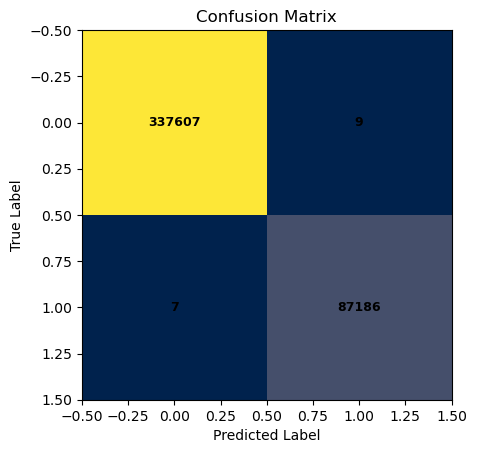

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and predictions (model predictions)

cm = confusion_matrix(y_test, predictions)  # Calculate confusion matrix

fig, ax = plt.subplots()  # Create a figure and axis

# Create a heatmap with customizability
ax.imshow(cm, cmap="cividis")  # Use "cividis" colormap

# Customize labels, title, and ticks (optional)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix")

for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, z, ha="center", va="center", fontsize=9, fontweight="bold")  # Add text for each cell

# Optional: Add colorbar
sm = plt.cm.ScalarMappable(cmap="cividis", cmap_norm=plt.Normalize(vmin=cm.min(), vmax=cm.max()))
sm.set_array([])
plt.colorbar(sm, label='Count')  # Create colorbar for reference

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()  # Display the plot


In [45]:

 # plot_confusion_matrix(model, X_test, y_test, cmap="cividis")

# 6.3 Classification report

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

         0.0    0.99998   0.99997   0.99998    337616
         1.0    0.99990   0.99992   0.99991     87193

    accuracy                        0.99996    424809
   macro avg    0.99994   0.99995   0.99994    424809
weighted avg    0.99996   0.99996   0.99996    424809



# 7- Saving model


In [50]:
import joblib
joblib.dump(model, "trained_models/decision-tree-classifier.pkl")


FileNotFoundError: [Errno 2] No such file or directory: 'trained_models/decision-tree-classifier.pkl'